In [1]:
# import the libraries required
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# load the data into a pandas dataframe and take a look at the first 10 rows
bread = pd.read_csv("BreadBasket_DMS.csv")
bread.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [3]:
records=[]
for i in bread.Transaction:
    records.append([bread.Item] while i)
print(records)

SyntaxError: invalid syntax (<ipython-input-3-b17ce31be9d7>, line 3)

In [4]:
# check the summary info of the dataframe
bread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [5]:
# check for missing values
bread.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [6]:
bread['Datetime'] = pd.to_datetime(bread['Date']+' '+bread['Time'])
bread = bread[["Datetime", "Transaction", "Item"]].set_index("Datetime")
bread.head(10)

,Transaction,Item
Datetime,,
2016-10-30 09:58:11,1,Bread
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:07:57,3,Hot chocolate
2016-10-30 10:07:57,3,Jam
2016-10-30 10:07:57,3,Cookies
2016-10-30 10:08:41,4,Muffin
2016-10-30 10:13:03,5,Coffee
2016-10-30 10:13:03,5,Pastry


In [7]:
bread.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [8]:
total_items = len(bread)
total_days = len(np.unique(bread.index.date))
total_months = len(np.unique(bread.index.month))
average_items = total_items / total_days
unique_items = bread.Item.unique().size

print("There are {} unique items sold by the Bakery".format(unique_items))
print("Total {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print("With an average of {} items sold daily".format(average_items))


There are 95 unique items sold by the Bakery
Total 21293 items sold in 159 days throughout 7 months
With an average of 133.9182389937107 items sold daily


In [17]:
# rank the top 10 best-selling items
bread.Item.value_counts()[:10]

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

[Text(0, 0.5, 'Percentage'), Text(0.5, 0, 'Item')]

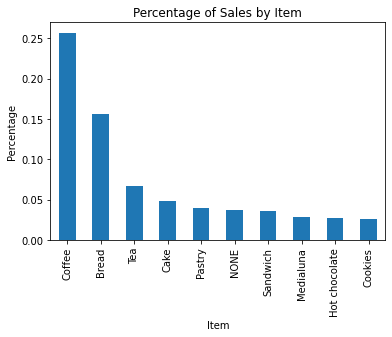

In [18]:
data=bread.Item.value_counts(normalize=True)[:10]
data.plot(kind="bar", title="Percentage of Sales by Item").set(xlabel="Item", ylabel="Percentage")

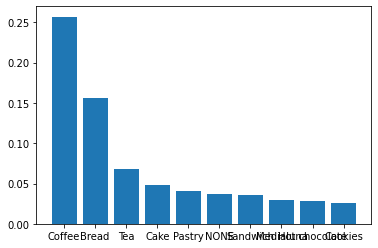

In [19]:
# create a bar chart, rank by percentage

data=bread.Item.value_counts(normalize=True)[:10]
#data.plot(kind="bar", title="Percentage of Sales by Item").set(xlabel="Item", ylabel="Percentage")
plt.bar(data.index,data)
plt.title="Percentage of Sales by Item"
plt.xlabel="Item"
plt.ylabel="Percentage"

[Text(0, 0.5, 'Total Number'), Text(0.5, 0, 'Item')]

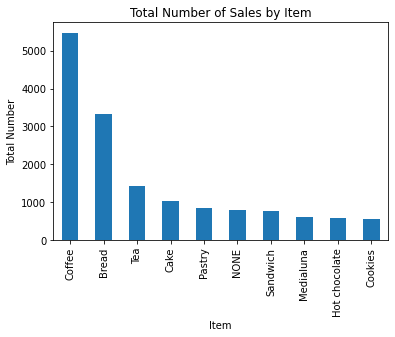

In [20]:
# create a bar chart, rank by value
bread.Item.value_counts()[:10].plot(kind="bar", title="Total Number of Sales by Item").set(xlabel="Item", ylabel="Total Number")

In [21]:
bread["Item"].resample("m").count()

Datetime
2016-10-31     385
2016-11-30    4607
2016-12-31    3569
2017-01-31    3509
2017-02-28    3991
2017-03-31    4041
2017-04-30    1191
Freq: M, Name: Item, dtype: int64

[Text(0, 0.5, 'Total Number of Items Sold'), Text(0.5, 0, 'Date')]

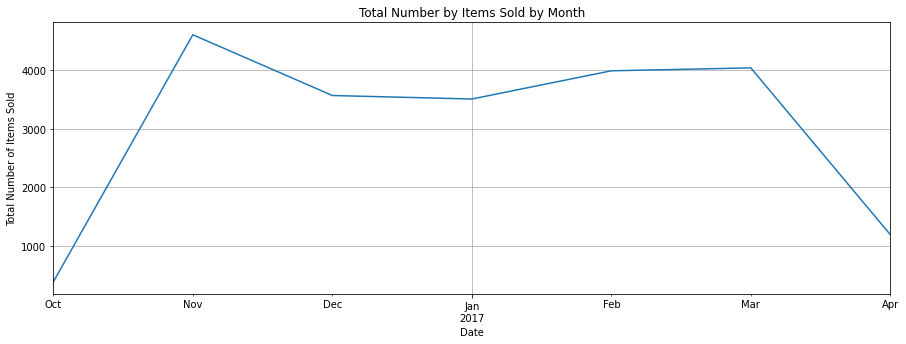

In [22]:
# plot time series chart of number of items by month
bread["Item"].resample("m").count().plot(figsize=(15,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0, 0.5, 'Total Number of Items Sold'), Text(0.5, 0, 'Date')]

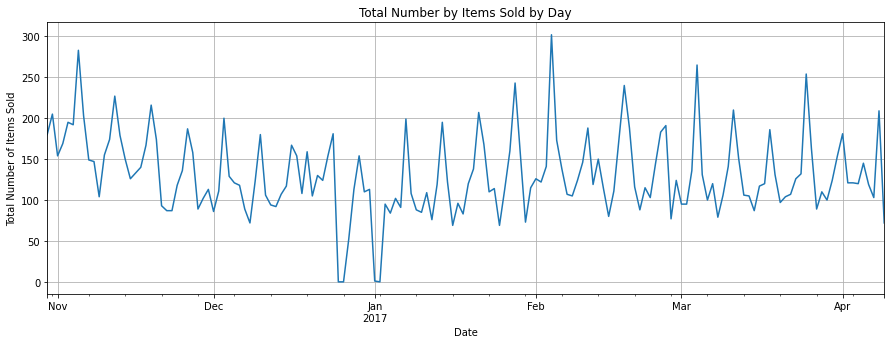

In [23]:
# plot time series chart of number of items by month
bread["Item"].resample("d").count().plot(figsize=(15,5), grid=True, title="Total Number by Items Sold by Day").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [25]:
# extract hour of the day and weekday of the week
# For Datetimeindex, the day of the week with Monday=0, Sunday=6, thereby +1 to become Monday=1, Sunday=7
bread["Hour"] = bread.index.hour
bread["Weekday"] = bread.index.weekday +1

bread.head(10)

,Transaction,Item,Hour,Weekday
Datetime,,,,
2016-10-30 09:58:11,1,Bread,9,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:07:57,3,Hot chocolate,10,7
2016-10-30 10:07:57,3,Jam,10,7
2016-10-30 10:07:57,3,Cookies,10,7
2016-10-30 10:08:41,4,Muffin,10,7
2016-10-30 10:13:03,5,Coffee,10,7
2016-10-30 10:13:03,5,Pastry,10,7


In [26]:
# but we need to find out how many each weekday in that period of transaction
# in order to calculate the average items per weekday

import datetime 
daterange = pd.date_range(datetime.date(2016, 10, 30), datetime.date(2017, 4, 9))

monday = 0
tuesday = 0
wednesday = 0
thursday = 0
friday = 0
saturday = 0
sunday = 0

for day in np.unique(bread.index.date):
    if day.isoweekday() == 1:
        monday += 1
    elif day.isoweekday() == 2:
        tuesday += 1
    elif day.isoweekday() == 3:
        wednesday += 1
    elif day.isoweekday() == 4:
        thursday += 1        
    elif day.isoweekday() == 5:
        friday += 1        
    elif day.isoweekday() == 6:
        saturday += 1        
    elif day.isoweekday() == 7:
        sunday += 1        
        
all_weekdays = monday + tuesday + wednesday + thursday + friday + saturday + sunday

print("monday = {0}, tuesday = {1}, wednesday = {2}, thursday = {3}, friday = {4}, saturday = {5}, sunday = {6}, total = {7}".format(monday, tuesday, wednesday, thursday, friday, saturday, sunday, all_weekdays))

monday = 21, tuesday = 23, wednesday = 23, thursday = 23, friday = 23, saturday = 23, sunday = 23, total = 159


In [27]:
bread_groupby_weekday=bread.groupby("Weekday").agg({"Item":lambda item :item.count()})
bread_groupby_weekday

,Item
Weekday,
1,2394
2,2480
3,2429
4,2719
5,3235
6,4803
7,3233


In [28]:
# apply the conditions to calculate the average items for each weekday

conditions = [
    (bread_groupby_weekday.index == 1),
    (bread_groupby_weekday.index == 2),
    (bread_groupby_weekday.index == 3),
    (bread_groupby_weekday.index == 4),
    (bread_groupby_weekday.index == 5),
    (bread_groupby_weekday.index == 6),
    (bread_groupby_weekday.index == 7)]

choices = [bread_groupby_weekday.Item/21, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23]

bread_groupby_weekday["Average"] = np.select(conditions, choices, default=0)
bread_groupby_weekday

,Item,Average
Weekday,,
1,2394,114.000000
2,2480,107.826087
3,2429,105.608696
4,2719,118.217391
5,3235,140.652174
6,4803,208.826087
7,3233,140.565217


[Text(0, 0.5, 'Average Number of Items Sold'),
 Text(0.5, 0, 'Day of the Week (1=Monday, 7=Sunday)')]

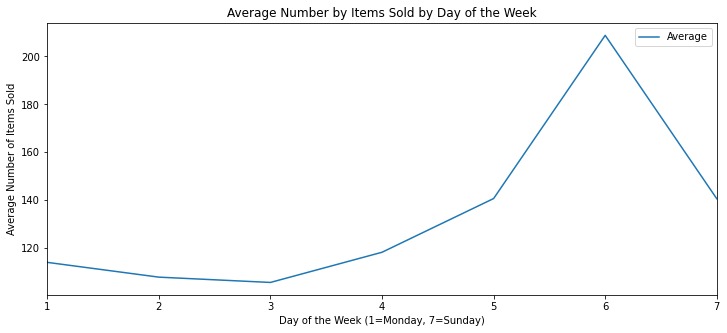

In [29]:
bread_groupby_weekday.plot(y="Average", figsize=(12,5), title="Average Number by Items Sold by Day of the Week").set(xlabel="Day of the Week (1=Monday, 7=Sunday)", ylabel="Average Number of Items Sold")

In [30]:
df = bread.groupby(["Transaction","Item"]).size().reset_index(name="Count")

df.head(8)

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
5,4,Muffin,1
6,5,Bread,1
7,5,Coffee,1


In [31]:
basket = (df.groupby(['Transaction', 'Item'])['Count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

basket.head(10)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
basket[basket.Coffee == 4].iloc[:,14:28]

Item,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes
Transaction,,,,,,,,,,,,,,
6560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
6850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
6887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [33]:
# the encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1


In [34]:
basket_sets = basket.applymap(encode_units)

basket_sets.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
basket_sets[basket_sets.Coffee == 1].iloc[3142:3145,14:28]

Item,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes
Transaction,,,,,,,,,,,,,,
6884,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6885,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6887,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [36]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True) #model or algorithm

In [37]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1) #model
rules.sort_values("confidence", ascending = False, inplace = True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789
31,(Spanish Brunch),(Coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493
18,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
24,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
1,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
17,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031
22,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908
26,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
7,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
29,(Scone),(Coffee),0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310
